# Table of Contents
### 01. Visualization and Data Library Importation
### 02. Importing dataframe
### 03. The elbow technique
### 04. k-means clustering

### 01. Visualization and Data Library Importation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
# Masking the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

### 02. Importing dataframe

In [4]:
# Importing sdg_merged dataframe
sdg_merged=pd.read_csv(('../02 Data/Prepared Data/sdg merged wrengled.csv'),index_col=0)
sdg_merged.head()

,country_code,country,year,overall_score,No Poverty,Zero Hunger,Good Health and Wellbeing,Quality Education,Gender Equality,Clean Water and Sanitation,...,"Industry, Innovation and Infrastructure",Reduced Inequalities,Sustainable Cities and Communities,Responsible Consumption and Production,Climate Action,Life Below Water,Life on Land,"Peace, Justice and Strong Institutions",Partnerships for the Goals,No Poverty category
0,AFG,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,...,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2,Middle No Poverty
1,AFG,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,...,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2,Middle No Poverty
2,AFG,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,...,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2,Middle No Poverty
3,AFG,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,...,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2,Middle No Poverty
4,AFG,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,...,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2,Middle No Poverty


In [5]:
sdg_merged.shape

(4247, 22)

In [7]:
sdg_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4247 entries, 0 to 4246
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country_code                             4247 non-null   object 
 1   country                                  4247 non-null   object 
 2   year                                     4247 non-null   int64  
 3   overall_score                            4247 non-null   float64
 4   No Poverty                               4247 non-null   float64
 5   Zero Hunger                              4247 non-null   float64
 6   Good Health and Wellbeing                4247 non-null   float64
 7   Quality Education                        4247 non-null   float64
 8   Gender Equality                          4247 non-null   float64
 9   Clean Water and Sanitation               4247 non-null   float64
 10  Affordable and Clean Energy              4247 no

In [5]:
# Drop culomns with categorical data type
sdg_no_cat=sdg_merged.drop(columns=['country','country_code','No Poverty category'])

In [6]:
sdg_no_cat

,year,overall_score,No Poverty,Zero Hunger,Good Health and Wellbeing,Quality Education,Gender Equality,Clean Water and Sanitation,Affordable and Clean Energy,Decent Work and Economic Growth,"Industry, Innovation and Infrastructure",Reduced Inequalities,Sustainable Cities and Communities,Responsible Consumption and Production,Climate Action,Life Below Water,Life on Land,"Peace, Justice and Strong Institutions",Partnerships for the Goals
0,2000,36.000000,28.8000,27.300000,19.200000,1.600000,20.80000,32.4000,21.00000,38.500000,5.200000,0.0000,25.800000,94.700000,99.400000,0.000000,51.9000,39.200000,34.200000
1,2001,36.300000,28.8000,30.600000,19.400000,1.600000,20.80000,32.4000,22.30000,38.500000,5.200000,0.0000,25.800000,94.500000,99.400000,0.000000,51.9000,39.200000,34.200000
2,2002,36.300000,28.8000,30.700000,19.700000,1.600000,20.80000,32.7000,21.50000,38.400000,5.200000,0.0000,26.100000,94.100000,99.400000,0.000000,51.8000,39.200000,34.200000
3,2003,36.700000,28.8000,32.500000,19.900000,1.600000,20.80000,33.0000,24.50000,38.400000,5.200000,0.0000,26.500000,94.400000,99.400000,0.000000,51.8000,39.200000,34.200000
4,2004,37.100000,28.8000,32.100000,21.100000,1.600000,20.80000,33.3000,28.00000,38.500000,5.200000,0.0000,26.800000,94.800000,99.400000,0.000000,51.8000,39.200000,34.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,2023,49.883810,26.3980,47.776143,32.815077,37.133250,44.10800,53.0020,13.28200,66.446143,11.586286,72.1075,29.805000,96.122600,98.843000,83.527167,48.1982,41.012909,45.861500
4243,2023,48.581701,8.1545,51.681375,34.237143,42.659667,43.17475,43.1840,28.85400,60.480571,14.408000,43.0305,35.670000,97.676167,99.560667,77.886750,69.7746,36.177222,39.279000
4244,2023,48.552594,32.5415,21.898333,51.921429,31.795500,42.60925,32.6000,55.11950,44.178857,15.400286,75.0325,34.808000,97.250200,99.139000,61.722800,49.2490,43.848200,36.279750
4245,2023,48.027231,11.2740,27.306833,17.860923,55.639000,25.86100,49.3006,43.31575,55.669500,5.599857,73.8030,69.417667,94.129000,99.925333,50.251200,53.3714,40.012200,43.725667


In [12]:
sdg_no_cat.describe()

,year,overall_score,No Poverty,Zero Hunger,Good Health and Wellbeing,Quality Education,Gender Equality,Clean Water and Sanitation,Affordable and Clean Energy,Decent Work and Economic Growth,"Industry, Innovation and Infrastructure",Reduced Inequalities,Sustainable Cities and Communities,Responsible Consumption and Production,Climate Action,Life Below Water,Life on Land,"Peace, Justice and Strong Institutions",Partnerships for the Goals
count,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000
mean,2011.302331,63.810287,65.176286,57.794174,64.225798,72.176887,55.985601,64.074543,57.486799,69.912924,37.573592,52.613359,70.002384,79.674469,81.978055,49.015592,64.713160,62.192049,55.677464
std,6.814613,10.788753,35.974981,11.112886,22.328609,26.456557,17.320707,15.349202,21.472004,10.027497,26.062037,31.177232,18.150558,16.717471,21.271097,27.849283,13.431565,14.610898,13.046680
min,2000.000000,36.000000,0.000000,7.700000,5.900000,0.000000,3.500000,11.300000,0.100000,38.400000,0.000000,0.000000,13.800000,32.900000,0.000000,0.000000,26.000000,27.900000,15.100000
25%,2005.000000,55.108814,31.900000,52.400000,45.200000,57.450000,43.300000,52.400000,41.500000,64.200000,15.800000,24.100000,55.610000,69.400000,72.900000,43.653250,55.100000,51.600000,46.150000
50%,2011.000000,65.200000,81.200000,59.000000,70.400000,80.800000,57.600000,64.600000,64.500000,70.100000,30.200000,53.942500,75.100000,84.800000,90.900000,59.200000,64.500000,61.000000,55.000000
75%,2017.000000,72.100000,98.600000,65.400000,81.400000,94.500000,68.900000,74.500000,72.100000,76.550000,53.750000,80.200000,84.800000,94.100000,97.123750,67.500000,73.900000,73.500000,65.000000
max,2023.000000,86.800000,100.000000,83.401125,97.300000,100.000000,94.021667,95.100000,99.600000,93.600000,99.200000,100.000000,99.900000,99.000000,99.925333,91.200000,97.900000,96.000000,100.000000


### 03. The elbow technique

In [7]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [8]:
score = [kmeans[i].fit(sdg_no_cat).score(sdg_no_cat) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.
score

[-33664665.116933495,
 -21259054.51544928,
 -16986071.967385232,
 -14622159.65138709,
 -13185479.755772388,
 -11844542.43470693,
 -10925536.318787485,
 -10461026.745825544,
 -10012716.154480916]

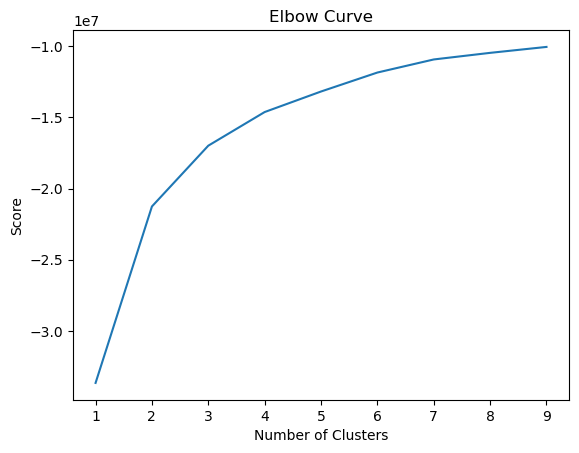

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I will select the number 4 for clusters. since the values go up from 1 through 4, then plateaus after 4. This means the best count for clusters is 4.

### 04. k-means clustering

In [9]:
# Create the k-means object.

kmeans = KMeans(n_clusters=4)

In [10]:
# Fit the k-means object to the data.
kmeans.fit(sdg_no_cat)

KMeans(n_clusters=4)

In [11]:
sdg_no_cat['clusters'] = kmeans.fit_predict(sdg_no_cat)

In [12]:
sdg_no_cat.head()

,year,overall_score,No Poverty,Zero Hunger,Good Health and Wellbeing,Quality Education,Gender Equality,Clean Water and Sanitation,Affordable and Clean Energy,Decent Work and Economic Growth,"Industry, Innovation and Infrastructure",Reduced Inequalities,Sustainable Cities and Communities,Responsible Consumption and Production,Climate Action,Life Below Water,Life on Land,"Peace, Justice and Strong Institutions",Partnerships for the Goals,clusters
0,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,21.0,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2,1
1,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,22.3,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2,1
2,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,21.5,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2,1
3,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,24.5,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2,1
4,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,28.0,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2,1


In [13]:
sdg_no_cat['clusters'].value_counts()

0    1700
1    1281
2     980
3     286
Name: clusters, dtype: int64

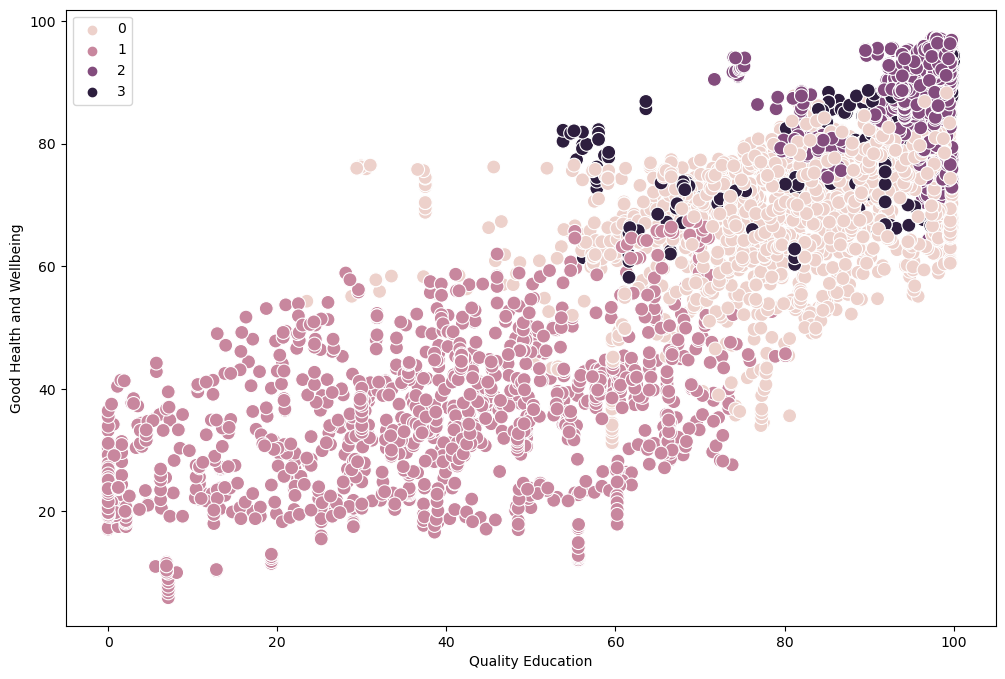

In [14]:
# Plot the clusters for the "Good Health and Wellbeing" and "Quality Education" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sdg_no_cat['Quality Education'], y=sdg_no_cat['Good Health and Wellbeing'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Quality Education') # Label x-axis.
plt.ylabel('Good Health and Wellbeing') # Label y-axis.
plt.show()

- Cluster 1 shows that there low number of countries with quality education score of 60 out of 100 which gives us low score of good health and wellbeing. on the other hand, cluster 0,2 and 3 are consentrated in the quality education score of above 60 this could mean that majority of the countries have high score in quality education which result in having a high score in good health and wellbeing.

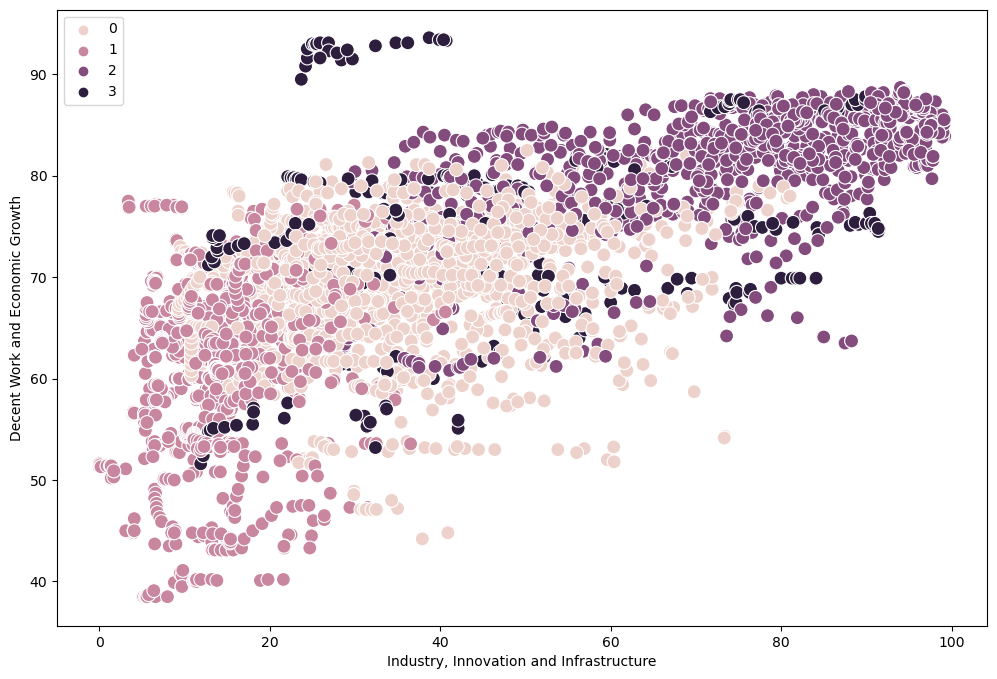

In [15]:
# Plot the clusters for the "Industry, Innovation and Infrastructure" and "Decent Work and Economic Growth" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sdg_no_cat['Industry, Innovation and Infrastructure'], y=sdg_no_cat['Decent Work and Economic Growth'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Industry, Innovation and Infrastructure')
plt.ylabel('Decent Work and Economic Growth')
plt.show()

- It is clear that the data points from cluster 2 are gathered in the area where higher Industry, Innovation and Infrastructure score is the higher Decent Work and Economic Growth score, which indicates that countries with better Industry, Innovation and Infrastructure score perform better with having Decent Work and Economic Growth. However, there are also some data points from cluster 3, where a relatively low Industry, Innovation and Infrastructure score goes along with high Decent Work and Economic Growth score.

In [16]:
sdg_no_cat.loc[sdg_no_cat['clusters'] == 3, 'cluster'] = 'dark purple'
sdg_no_cat.loc[sdg_no_cat['clusters'] == 2, 'cluster'] = 'purple'
sdg_no_cat.loc[sdg_no_cat['clusters'] == 1, 'cluster'] = 'light purple'
sdg_no_cat.loc[sdg_no_cat['clusters'] == 0, 'cluster'] = 'pink'

In [17]:
sdg_no_cat.groupby('cluster').agg({'Quality Education':['mean', 'median'], 
                         'Good Health and Wellbeing':['mean', 'median'], 
                         'Industry, Innovation and Infrastructure':['mean', 'median'],
                          'Decent Work and Economic Growth':['mean', 'median']})

Quality Education        Good Health and Wellbeing         \
                          mean median                      mean median   
cluster                                                                  
dark purple          86.109422   91.9                 79.809506   81.3   
light purple         39.527180   41.3                 35.762521   35.5   
pink                 80.936811   82.4                 69.262347   71.2   
purple               95.592905   96.6                 88.146598   89.8   

             Industry, Innovation and Infrastructure         \
                                                mean median   
cluster                                                       
dark purple                                46.693306   41.5   
light purple                               13.527301   13.1   
pink                                       33.989375   31.6   
purple                                     72.561583   77.0   

             Decent Work and Economic Growth          
                                        mean  median  
cluster                                               
dark purple                        74.207378  74.800  
light purple                       61.398590  63.300  
pink                               69.323803  69.989  
purple                             80.811040  82.450

- The purple cluster has the highest mean and median values for all varibles. followed by the dark purple, pink, and lastly light purple cluster.

###### Propose what these results could be useful for in future steps of an analytics pipeline.
- This analysis is useful in understanding the relationship between variables. There was a misconseption in which when Industry, Innovation and Infrastructure score high the other varible will be high too but I found out that this is not always the case since even with low score the other varibles still have average high score.
- as a next step we could
- Check which countries have high score with the above varibles.
- Check if the above varibles improved or not over the years.

In [18]:
# Export sdg_no_cat data to csv
sdg_no_cat.to_csv('../02 Data/Prepared Data/sdg clusters.csv')